# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html,'html.parser')

In [8]:
# Extract all rows of data
table = soup.find('table', class_ = 'table')

#extract all rows from table
table_rows = table.find_all('tr')
#create unique list of table headers from the first row table_rows
table_headers = [th.text for th in table_rows[0].find_all("th")]

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [9]:
# Create an empty list
table_data = []

#Loop through the scraped data to create a list of rows
for row in table.find_all('tr',class_='data-row'):
    data = row.find_all('td')
    table_data.append([td.text for td in data])



In [10]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df = pd.DataFrame(table_data, columns = table_headers)


In [11]:
# Confirm DataFrame was created successfully
mars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [12]:
# Examine data type of each column
mars_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [13]:
# Change data types for data analysis (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html)
mars_df = mars_df.astype({
    'terrestrial_date':'datetime64[ns]',
    'sol':'int32',
    'ls':'int32',
    'month':'int32',
    'min_temp':'float64',
    'pressure':'float64'
})

In [14]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [20]:
# 1. How Many months exist on mars?
unique_months = mars_df['month'].unique()
print(f"There are {len(unique_months)} months on mars.")

There are 12 months on mars.


In [22]:
# 2. How many sols (Martian days) worth of data are there?
sols_count = mars_df['sol'].count()
sols_count

1867

In [38]:
# 3. What is the average minimum temperature by month?
avg_min_temps_by_Month_df = mars_df[["month","min_temp"]]
avg_min_temps_by_Month_df = avg_min_temps_by_Month_df.groupby("month").mean()
avg_min_temps_by_Month_df

,min_temp
month,
1,-77.160920
2,-79.932584
3,-83.307292
4,-82.747423
5,-79.308725
6,-75.299320
7,-72.281690
8,-68.382979
9,-69.171642


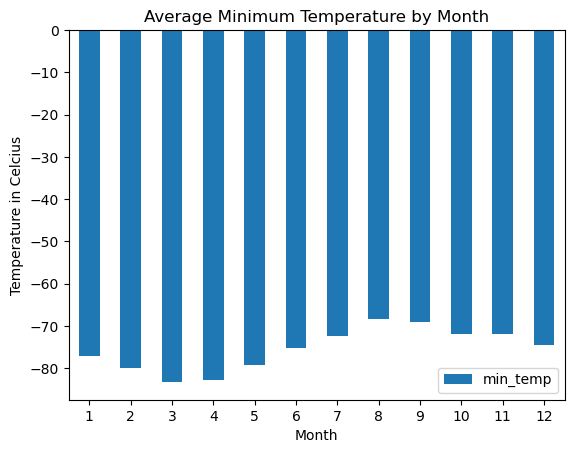

In [42]:
# Plot the average minimum temperature by month
avg_min_temps_by_Month_df.plot.bar(xlabel = 'Month',
                                  ylabel = "Temperature in Celcius",
                                  title = "Average Minimum Temperature by Month",
                                  rot = 0)
plt.show()

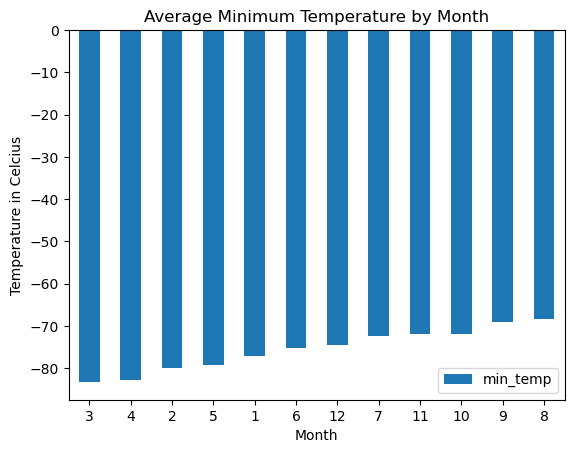

In [43]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
avg_min_temps_by_Month_df_sorted_by_temp = avg_min_temps_by_Month_df.sort_values(by='min_temp')
avg_min_temps_by_Month_df_sorted_by_temp.plot.bar(xlabel = 'Month',
                                                  ylabel = "Temperature in Celcius",
                                                  title = "Average Minimum Temperature by Month",
                                                  rot = 0
                                                 )

plt.show()

In [44]:
# 4. What is the average pressure by month?
avg_pressure_by_Month_df = mars_df[["month","pressure"]]
avg_pressure_by_Month_df = avg_pressure_by_Month_df.groupby("month").mean()
avg_pressure_by_Month_df

,pressure
month,
1,862.488506
2,889.455056
3,877.322917
4,806.329897
5,748.557047
6,745.054422
7,795.105634
8,873.829787
9,913.305970


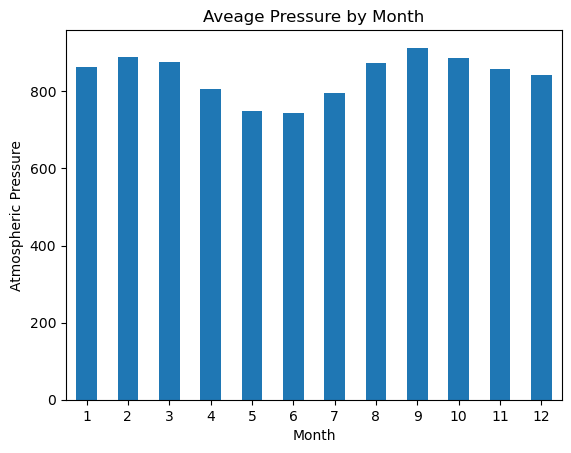

In [48]:
# Plot the average pressure by month
avg_pressure_by_Month_df.plot.bar(title="Aveage Pressure by Month",
                                 xlabel = "Month",
                                 ylabel="Atmospheric Pressure",
                                 rot = 0,
                                 legend = False)

plt.show()

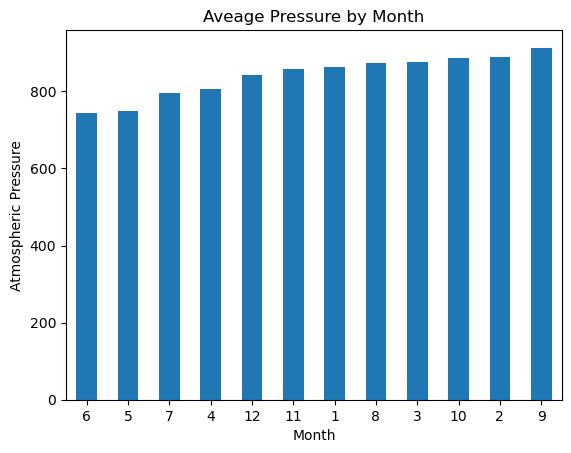

In [49]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
avg_pressure_by_month_df_sorted = avg_pressure_by_Month_df.sort_values(by='pressure')
avg_pressure_by_month_df_sorted.plot.bar(title="Aveage Pressure by Month",
                                 xlabel = "Month",
                                 ylabel="Atmospheric Pressure",
                                 rot = 0,
                                 legend = False)

plt.show()

In [52]:
earth_dates_df = mars_df[["terrestrial_date","min_temp"]]
earth_dates_df

,terrestrial_date,min_temp
0,2012-08-16,-75.0
1,2012-08-17,-76.0
2,2012-08-18,-76.0
3,2012-08-19,-74.0
4,2012-08-20,-74.0
...,...,...
1862,2018-02-23,-78.0
1863,2018-02-24,-77.0
1864,2018-02-25,-76.0
1865,2018-02-26,-77.0


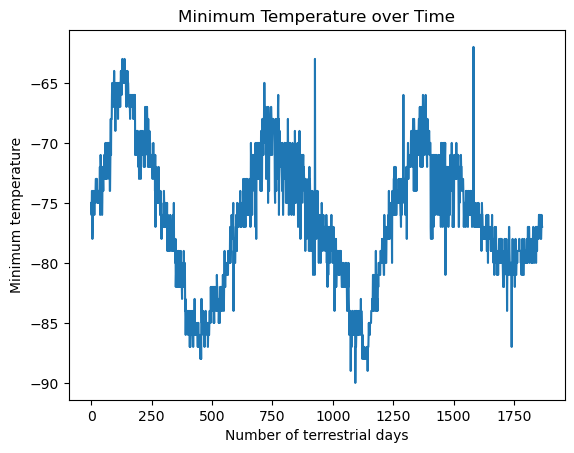

In [20]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.


#### Minimum Temperature

On average, the third Month had the lowest temperature, followed by the forth month.

On average, the eigth Martian month had the highest recorded temperatures.

#### Atmospheric Pressure

The sixth Martian month had the lowest average atmospheric pressure recorded.

The ninth Martian month had the highest avearge atmospheric pressure recorded.

#### Year Length

YOUR ANALYSIS HERE

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [50]:
# Write the data to a CSV


mars_df.to_csv('mars_data.csv',index=False)

In [7]:
browser.quit()